In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [8]:
#reading the dataset
data=pd.read_csv('Onion Prices 2020.csv')
print(data)



                 state            district                         market  \
0       Andhra Pradesh             Kurnool                        Kurnool   
1       Andhra Pradesh             Kurnool                        Kurnool   
2       Andhra Pradesh             Kurnool                        Kurnool   
3       Andhra Pradesh             Kurnool                        Kurnool   
4       Andhra Pradesh             Kurnool                        Kurnool   
...                ...                 ...                            ...   
107290     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107291     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107292     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107293     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107294     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   

       commodity variety arrival_date  min_price  max_price  modal_price  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         107295 non-null  object 
 1   district      107295 non-null  object 
 2   market        107295 non-null  object 
 3   commodity     107295 non-null  object 
 4   variety       107295 non-null  object 
 5   arrival_date  107295 non-null  object 
 6   min_price     107295 non-null  int64  
 7   max_price     107295 non-null  int64  
 8   modal_price   107295 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.4+ MB


In [5]:
#checking for any null values
print (data.isnull().values.any())



False


In [6]:
data.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [ ]:
#dropping the columns 

d1=data.drop(['variety','market'],axis=1)
print(d1.head(5))



            state district commodity arrival_date  min_price  max_price  \
0  Andhra Pradesh  Kurnool     Onion   03/01/2020       1350       4390   
1  Andhra Pradesh  Kurnool     Onion   04/01/2020       1390       4400   
2  Andhra Pradesh  Kurnool     Onion   06/01/2020       1460       5150   
3  Andhra Pradesh  Kurnool     Onion   07/01/2020       2010       5200   
4  Andhra Pradesh  Kurnool     Onion   10/01/2020       1320       4050   

   modal_price  
0       3100.0  
1       3200.0  
2       4310.0  
3       4200.0  
4       3300.0  


In [227]:
#spliting the date in day month and year in separte columns
d1[["day", "month", "year"]] = d1["arrival_date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(d1)


New DataFrame:
                 state            district commodity arrival_date  min_price  \
0       Andhra Pradesh             Kurnool     Onion   03/01/2020       1350   
1       Andhra Pradesh             Kurnool     Onion   04/01/2020       1390   
2       Andhra Pradesh             Kurnool     Onion   06/01/2020       1460   
3       Andhra Pradesh             Kurnool     Onion   07/01/2020       2010   
4       Andhra Pradesh             Kurnool     Onion   10/01/2020       1320   
...                ...                 ...       ...          ...        ...   
107290     West Bengal  Sounth 24 Parganas     Onion   03/09/2020       2200   
107291     West Bengal  Sounth 24 Parganas     Onion   04/09/2020       2050   
107292     West Bengal  Sounth 24 Parganas     Onion   08/09/2020       2700   
107293     West Bengal  Sounth 24 Parganas     Onion   09/09/2020       2625   
107294     West Bengal  Sounth 24 Parganas     Onion   10/09/2020       2800   

        max_price  moda

In [228]:
print(d1.head(5))

            state district commodity arrival_date  min_price  max_price  \
0  Andhra Pradesh  Kurnool     Onion   03/01/2020       1350       4390   
1  Andhra Pradesh  Kurnool     Onion   04/01/2020       1390       4400   
2  Andhra Pradesh  Kurnool     Onion   06/01/2020       1460       5150   
3  Andhra Pradesh  Kurnool     Onion   07/01/2020       2010       5200   
4  Andhra Pradesh  Kurnool     Onion   10/01/2020       1320       4050   

   modal_price day month  year  
0       3100.0  03    01  2020  
1       3200.0  04    01  2020  
2       4310.0  06    01  2020  
3       4200.0  07    01  2020  
4       3300.0  10    01  2020  


In [229]:
d2=d1.copy()

In [230]:
print(d2.head(5))

            state district commodity arrival_date  min_price  max_price  \
0  Andhra Pradesh  Kurnool     Onion   03/01/2020       1350       4390   
1  Andhra Pradesh  Kurnool     Onion   04/01/2020       1390       4400   
2  Andhra Pradesh  Kurnool     Onion   06/01/2020       1460       5150   
3  Andhra Pradesh  Kurnool     Onion   07/01/2020       2010       5200   
4  Andhra Pradesh  Kurnool     Onion   10/01/2020       1320       4050   

   modal_price day month  year  
0       3100.0  03    01  2020  
1       3200.0  04    01  2020  
2       4310.0  06    01  2020  
3       4200.0  07    01  2020  
4       3300.0  10    01  2020  


In [231]:
#droping the 
d3=d2.drop('arrival_date',axis=1)
print(d3.head(5))

            state district commodity  min_price  max_price  modal_price day  \
0  Andhra Pradesh  Kurnool     Onion       1350       4390       3100.0  03   
1  Andhra Pradesh  Kurnool     Onion       1390       4400       3200.0  04   
2  Andhra Pradesh  Kurnool     Onion       1460       5150       4310.0  06   
3  Andhra Pradesh  Kurnool     Onion       2010       5200       4200.0  07   
4  Andhra Pradesh  Kurnool     Onion       1320       4050       3300.0  10   

  month  year  
0    01  2020  
1    01  2020  
2    01  2020  
3    01  2020  
4    01  2020  


In [232]:
df=d3
df

,state,district,commodity,min_price,max_price,modal_price,day,month,year
0,Andhra Pradesh,Kurnool,Onion,1350,4390,3100.0,03,01,2020
1,Andhra Pradesh,Kurnool,Onion,1390,4400,3200.0,04,01,2020
2,Andhra Pradesh,Kurnool,Onion,1460,5150,4310.0,06,01,2020
3,Andhra Pradesh,Kurnool,Onion,2010,5200,4200.0,07,01,2020
4,Andhra Pradesh,Kurnool,Onion,1320,4050,3300.0,10,01,2020
...,...,...,...,...,...,...,...,...,...
107290,West Bengal,Sounth 24 Parganas,Onion,2200,2300,2250.0,03,09,2020
107291,West Bengal,Sounth 24 Parganas,Onion,2050,2600,2200.0,04,09,2020
107292,West Bengal,Sounth 24 Parganas,Onion,2700,2875,2800.0,08,09,2020
107293,West Bengal,Sounth 24 Parganas,Onion,2625,2875,2800.0,09,09,2020


In [233]:
type(df)


pandas.core.frame.DataFrame

In [262]:
df=df.iloc[:,:].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [235]:
from sklearn.preprocessing import LabelEncoder

In [236]:
country=LabelEncoder()

In [237]:
df[:,0]=country.fit_transform(df[:,0])
df

array([[0, 'Kurnool', 'Onion', ..., '03', '01', '2020'],
       [0, 'Kurnool', 'Onion', ..., '04', '01', '2020'],
       [0, 'Kurnool', 'Onion', ..., '06', '01', '2020'],
       ...,
       [21, 'Sounth 24 Parganas', 'Onion', ..., '08', '09', '2020'],
       [21, 'Sounth 24 Parganas', 'Onion', ..., '09', '09', '2020'],
       [21, 'Sounth 24 Parganas', 'Onion', ..., '10', '09', '2020']],
      dtype=object)

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [239]:
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder='passthrough')

In [240]:
y=ct.fit_transform(df)


In [241]:
y

array([[1.0, 0.0, 0.0, ..., '03', '01', '2020'],
       [1.0, 0.0, 0.0, ..., '04', '01', '2020'],
       [1.0, 0.0, 0.0, ..., '06', '01', '2020'],
       ...,
       [0.0, 0.0, 0.0, ..., '08', '09', '2020'],
       [0.0, 0.0, 0.0, ..., '09', '09', '2020'],
       [0.0, 0.0, 0.0, ..., '10', '09', '2020']], dtype=object)

In [242]:
y=pd.DataFrame(y)
y

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Kurnool,Onion,1350,4390,3100.0,03,01,2020
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Kurnool,Onion,1390,4400,3200.0,04,01,2020
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Kurnool,Onion,1460,5150,4310.0,06,01,2020
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Kurnool,Onion,2010,5200,4200.0,07,01,2020
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Kurnool,Onion,1320,4050,3300.0,10,01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Sounth 24 Parganas,Onion,2200,2300,2250.0,03,09,2020
107291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Sounth 24 Parganas,Onion,2050,2600,2200.0,04,09,2020
107292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Sounth 24 Parganas,Onion,2700,2875,2800.0,08,09,2020
107293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Sounth 24 Parganas,Onion,2625,2875,2800.0,09,09,2020


In [264]:

b=y.iloc[:,26:27]
independent=b
independent

,26
0,3100.0
1,3200.0
2,4310.0
3,4200.0
4,3300.0
...,...
107290,2250.0
107291,2200.0
107292,2800.0
107293,2800.0


In [265]:
dependent=y.loc[:,26]
dependent

0         3100.0
1         3200.0
2         4310.0
3         4200.0
4         3300.0
           ...  
107290    2250.0
107291    2200.0
107292    2800.0
107293    2800.0
107294    2870.0
Name: 26, Length: 107295, dtype: object

KeyError: (slice(None, None, None), None)

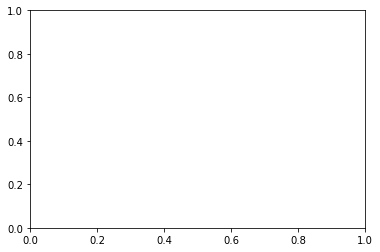

In [266]:
plt.plot(independent,dependent)
plt.show()

In [267]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent,dependent,test_size = 0.2, random_state = 0)

In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
regressor=LinearRegression()

In [270]:
regressor.fit(x_train,y_train)

LinearRegression()

In [271]:
y_pred=regressor.predict(x_test)

In [272]:
y_pred

array([ 910., 1850., 1300., ..., 1080., 2340., 2700.])

In [273]:
y_test

69739     910.0
72339    1850.0
66070    1300.0
58982    1300.0
35041    1300.0
          ...  
91681    1290.0
23602    3400.0
81544    1080.0
86787    2340.0
46155    2700.0
Name: 26, Length: 21459, dtype: object

In [274]:
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

print(rmse)

2.120436627002524e-11
